<a href="https://colab.research.google.com/github/DELEEUM/Coursera/blob/main/degrees_that_pay_back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# โหลดข้อมูล
df = pd.read_csv("degrees-that-pay-back.csv")
df.head()

,Undergraduate_Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000,77100,67.6,42200,56100,108000,152000
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000,161000
2,Agriculture,42600,71900,68.8,36300,52100,96300,150000
3,Anthropology,36800,61500,67.1,33800,45500,89300,138000
4,Architecture,41600,76800,84.6,50600,62200,97000,136000


In [ ]:
# เลือกเฉพาะคอลัมน์ตัวเลข
x = df.iloc [:,1:]
y = df['Undergraduate_Major']
x.head()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,46000,77100,67.6,42200,56100,108000,152000
1,57700,101000,75.0,64300,82100,127000,161000
2,42600,71900,68.8,36300,52100,96300,150000
3,36800,61500,67.1,33800,45500,89300,138000
4,41600,76800,84.6,50600,62200,97000,136000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

# Modeling: KMEANS

In [ ]:
# Define model: let’s do 5 clusters
kmeans_model = KMeans(n_clusters= 2,
                      init = 'k-means++',
                      random_state = 123)
# Fit model
kmeans_model.fit(X_std)

KMeans(n_clusters=2, random_state=123)

In [ ]:
# Evaluation
# SSE (ไม่ใช้ค่า y)
print('SSE', kmeans_model.inertia_)

# NMI (รุ้ว่าค่าของแต่ละกลุ่ม label เป็นยังไง)
y_pred = kmeans_model.predict(X_std)

from sklearn import metrics
print('NMI', metrics.normalized_mutual_info_score(y,y_pred))

SSE 158.83174573821424
NMI 0.26324369983324575


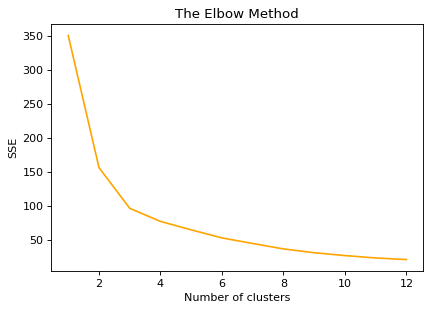

In [ ]:
sse = []
for i in range(1, 13):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =
300, n_init = 10, random_state = 0)
 kmeans.fit(X_std)
 sse.append(kmeans.inertia_)
plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 13), sse, color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 2,
                      init = 'random',
                      random_state = 123)
# Fit model
kmeans_model.fit(X_std)
# Evaluation
# SSE (ไม่ใช้ค่า y)
print('SSE', kmeans_model.inertia_)

# NMI (รุ้ว่าค่าของแต่ละกลุ่ม label เป็นยังไง)
y_pred = kmeans_model.predict(X_std)

from sklearn import metrics
print('NMI', metrics.normalized_mutual_info_score(y,y_pred))

SSE 155.91219202961037
NMI 0.29984734521451195


In [ ]:
kmeans_model = KMeans(n_clusters = 3,
                      init = 'k-means++',
                      random_state = 123)
# Fit model
kmeans_model.fit(X_std)

KMeans(n_clusters=3, random_state=123)

In [ ]:
# Evaluation
# SSE (ไม่ใช้ค่า y)
print('SSE', kmeans_model.inertia_)

# NMI (รุ้ว่าค่าของแต่ละกลุ่ม label เป็นยังไง)
y_pred = kmeans_model.predict(X_std)

from sklearn import metrics
print('NMI', metrics.normalized_mutual_info_score(y,y_pred))

SSE 96.09756384065767
NMI 0.4306951959453957


In [ ]:
kmeans_model.cluster_centers_

array([[-0.24292962,  0.16634287,  0.85446197, -0.18932198, -0.04432375,
         0.31803678,  0.48425836],
       [ 1.48631199,  1.40941457, -0.01545412,  1.54461931,  1.52234918,
         1.22921011,  0.88500143],
       [-0.65266383, -0.94003827, -0.68287639, -0.72937896, -0.83403269,
        -0.95986412, -0.89773378]])

In [ ]:
kmeans_model.labels_ #เลขของกลุ่มเรียงตามinstance

array([0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1,
       1, 0, 2, 2, 2, 2], dtype=int32)

In [ ]:
# Create df_labeled
df_labeled = df.copy()
df_labeled['clusters'] = kmeans_model.labels_

In [ ]:
df_labeled[df_labeled['clusters'] == 0]

,Undergraduate_Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,clusters
0,Accounting,46000,77100,67.6,42200,56100,108000,152000,0
2,Agriculture,42600,71900,68.8,36300,52100,96300,150000,0
4,Architecture,41600,76800,84.6,50600,62200,97000,136000,0
7,Business Management,43000,72100,67.7,38800,51500,102000,147000,0
9,Chemistry,42600,79900,87.6,45300,60700,108000,148000,0
11,Communications,38100,70000,83.7,37500,49700,98800,143000,0
21,Film,37900,68500,80.7,33900,45500,100000,136000,0
22,Finance,47900,88300,84.3,47200,62100,128000,195000,0
25,Geology,43500,79500,82.8,45000,59600,101000,156000,0
28,History,39200,71000,81.1,37000,49200,103000,149000,0


In [ ]:
df_labeled[df_labeled['clusters'] == 1]

,Undergraduate_Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,clusters
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000,161000,1
8,Chemical Engineering,63200,107000,69.3,71900,87300,143000,194000,1
10,Civil Engineering,53900,90500,67.9,63400,75100,115000,148000,1
12,Computer Engineering,61400,105000,71.0,66100,84100,135000,162000,1
13,Computer Science,55900,95500,70.8,56000,74900,122000,154000,1
14,Construction,53700,88900,65.5,56300,68100,118000,171000,1
17,Economics,50100,98600,96.8,50600,70600,145000,210000,1
19,Electrical Engineering,60900,103000,69.1,69300,83800,130000,168000,1
30,Industrial Engineering,57700,94700,64.1,57100,72300,132000,173000,1
38,Mechanical Engineering,57900,93600,61.7,63700,76200,120000,163000,1


In [ ]:
df_labeled[df_labeled['clusters'] == 2]

,Undergraduate_Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,clusters
3,Anthropology,36800,61500,67.1,33800,45500,89300,138000,2
5,Art History,35800,64900,81.3,28800,42200,87400,125000,2
6,Biology,38800,64800,67.0,36900,47400,94500,135000,2
15,Criminal Justice,35000,56300,60.9,32200,41600,80700,107000,2
16,Drama,35900,56900,58.5,36700,41300,79100,153000,2
18,Education,34900,52000,49.0,29300,37900,73400,102000,2
20,English,38000,64700,70.3,33400,44800,93200,133000,2
23,Forestry,39100,62600,60.1,41000,49300,78200,111000,2
24,Geography,41200,65500,59.0,40000,50000,90800,132000,2
26,Graphic Design,35700,59800,67.5,36000,45500,80800,112000,2


# Agglomerative

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Define model: let’s do 3 clusters. How to measure the similarity?   ต้องทำอันนี้!!
agg_cluster = AgglomerativeClustering(linkage = 'average',
                                     metric = 'euclidean',
                                     n_clusters = 3)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Fit model
clusters = agg_cluster.fit_predict(x_scaled)

#Evaluation: NMI
y_pred = agg_cluster.fit_predict(X_std)
print('NMI', metrics.normalized_mutual_info_score(y,y_pred))

NMI 0.3140337740930137


NMI 0.36612107650692816


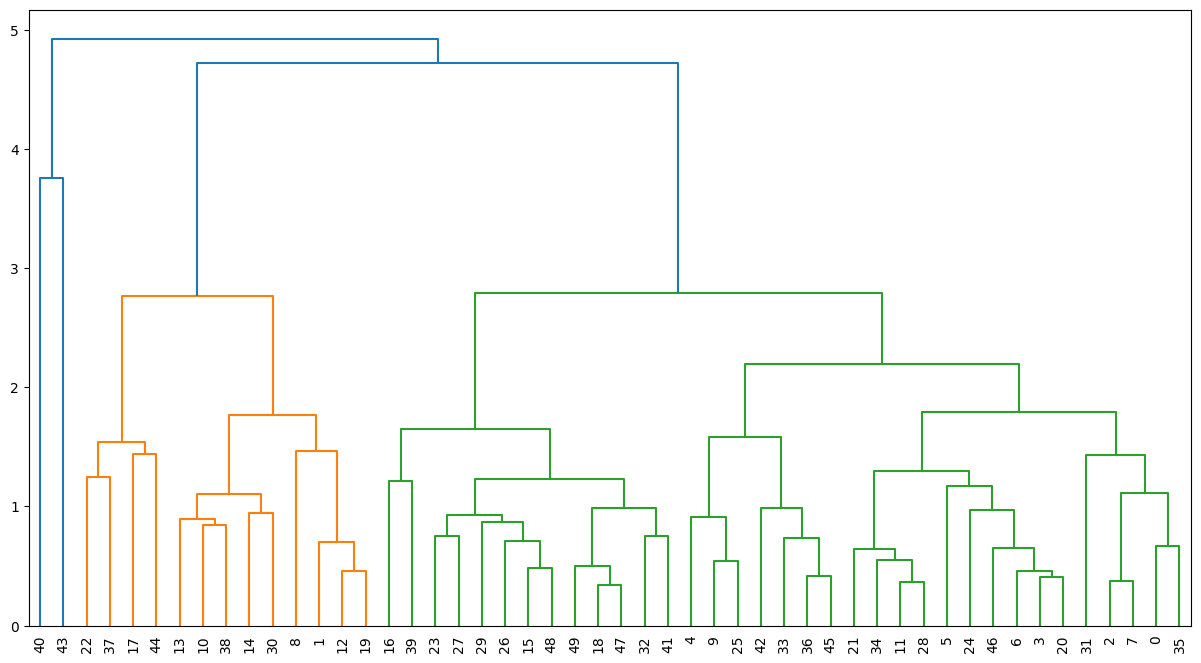

In [ ]:
#Define model: let’s do 3 clusters. How to measure the similarity?   ต้องทำอันนี้!!
agg_cluster = AgglomerativeClustering(linkage = 'average',
                                     metric = 'cosine',
                                     n_clusters = 3)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Fit model
clusters = agg_cluster.fit_predict(x_scaled)

#Evaluation: NMI
y_pred = agg_cluster.fit_predict(X_std)
print('NMI', metrics.normalized_mutual_info_score(y,y_pred))


#Plot dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(facecolor='w', figsize=(15,8))
dendrogram(linkage(X_std, method='average'), leaf_font_size=10)
plt.show()

In [ ]:
#Define model: let’s do 3 clusters. How to measure the similarity?   ต้องทำอันนี้!!
agg_cluster = AgglomerativeClustering(linkage = 'average',
                                     metric = 'l1',
                                     n_clusters = 3)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Fit model
clusters = agg_cluster.fit_predict(x_scaled)

#Evaluation: NMI
y_pred = agg_cluster.fit_predict(X_std)
print('NMI', metrics.normalized_mutual_info_score(y,y_pred))

NMI 0.3308732009773953


In [ ]:
#Define model: let’s do 3 clusters. How to measure the similarity?   ต้องทำอันนี้!!
agg_cluster = AgglomerativeClustering(linkage = 'average',
                                     metric = 'l2',
                                     n_clusters = 3)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Fit model
clusters = agg_cluster.fit_predict(x_scaled)

#Evaluation: NMI
y_pred = agg_cluster.fit_predict(X_std)
print('NMI', metrics.normalized_mutual_info_score(y,y_pred))

NMI 0.3140337740930137
